In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas_profiling
from ast import literal_eval

# 1. Import the data set

In [2]:
df = pd.read_csv(r'\Users\marcp\Desktop\Ironhack\Clases\FINAL PROJECT\Project 2\RAW_recipes.csv')

# 2. Explore the data

In [3]:
df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [4]:
df.dtypes

name              object
id                 int64
minutes            int64
contributor_id     int64
submitted         object
tags              object
nutrition         object
n_steps            int64
steps             object
description       object
ingredients       object
n_ingredients      int64
dtype: object

Modifying the Submitted type to date

In [5]:
df['submitted'] = pd.to_datetime(df['submitted'])

In [6]:
# We add a column for the year
df['year'] = df['submitted'].dt.year

In [7]:
df.columns

Index(['name', 'id', 'minutes', 'contributor_id', 'submitted', 'tags',
       'nutrition', 'n_steps', 'steps', 'description', 'ingredients',
       'n_ingredients', 'year'],
      dtype='object')

In [8]:
df.describe()

,id,minutes,contributor_id,n_steps,n_ingredients,year
count,231637.000000,2.316370e+05,2.316370e+05,231637.000000,231637.000000,231637.000000
mean,222014.708984,9.398546e+03,5.534885e+06,9.765499,9.051153,2006.388038
std,141206.635626,4.461963e+06,9.979141e+07,5.995128,3.734796,2.996769
min,38.000000,0.000000e+00,2.700000e+01,0.000000,1.000000,1999.000000
25%,99944.000000,2.000000e+01,5.690500e+04,6.000000,6.000000,2004.000000
50%,207249.000000,4.000000e+01,1.736140e+05,9.000000,9.000000,2007.000000
75%,333816.000000,6.500000e+01,3.982750e+05,12.000000,11.000000,2008.000000
max,537716.000000,2.147484e+09,2.002290e+09,145.000000,43.000000,2018.000000


# 3. Decide to create multiple columns for each value in column nutrition (We will use it later for filtering)

First, we separate nutrition values in the column nutrition and create a new data frame

In [9]:
dfn = df['nutrition'].str.split(expand=True)


In [10]:
dfn

,0,1,2,3,4,5,6
0,"[51.5,","0.0,","13.0,","0.0,","2.0,","0.0,",4.0]
1,"[173.4,","18.0,","0.0,","17.0,","22.0,","35.0,",1.0]
2,"[269.8,","22.0,","32.0,","48.0,","39.0,","27.0,",5.0]
3,"[368.1,","17.0,","10.0,","2.0,","14.0,","8.0,",20.0]
4,"[352.9,","1.0,","337.0,","23.0,","3.0,","0.0,",28.0]
...,...,...,...,...,...,...,...
231632,"[415.2,","26.0,","34.0,","26.0,","44.0,","21.0,",15.0]
231633,"[14.8,","0.0,","2.0,","58.0,","1.0,","0.0,",1.0]
231634,"[59.2,","6.0,","2.0,","3.0,","6.0,","5.0,",0.0]
231635,"[188.0,","11.0,","57.0,","11.0,","7.0,","21.0,",9.0]


In [11]:
# Check dtypes
dfn.dtypes

0    object
1    object
2    object
3    object
4    object
5    object
6    object
dtype: object

Second, we clean them

In [12]:
# Delete ,

for x in dfn:
    dfn[x] = dfn[x].str.replace(',', '')

In [13]:
# Delete [] 
for x in dfn:
    dfn[x] = dfn[x].str.replace('[', '')

In [14]:
for x in dfn:
    dfn[x] = dfn[x].str.replace(']', '')

In [15]:
dfn

,0,1,2,3,4,5,6
0,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,269.8,22.0,32.0,48.0,39.0,27.0,5.0
3,368.1,17.0,10.0,2.0,14.0,8.0,20.0
4,352.9,1.0,337.0,23.0,3.0,0.0,28.0
...,...,...,...,...,...,...,...
231632,415.2,26.0,34.0,26.0,44.0,21.0,15.0
231633,14.8,0.0,2.0,58.0,1.0,0.0,1.0
231634,59.2,6.0,2.0,3.0,6.0,5.0,0.0
231635,188.0,11.0,57.0,11.0,7.0,21.0,9.0


Convert to floating type

In [16]:
# Convert dtypes
dfn = dfn.astype(float)

In [17]:
dfn.dtypes

0    float64
1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
dtype: object

Change columns names

In [18]:
# Change columns names:

dfn.rename(columns={0: 'calories',
                   1: 'total_fat',
                   2: 'sugar',
                   3: 'sodium',
                    4: 'protein',
                   5: 'saturated_fat',
                    6: 'carbohydrates',
                   },
            inplace=True, errors='raise')
    
dfn

,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates
0,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,269.8,22.0,32.0,48.0,39.0,27.0,5.0
3,368.1,17.0,10.0,2.0,14.0,8.0,20.0
4,352.9,1.0,337.0,23.0,3.0,0.0,28.0
...,...,...,...,...,...,...,...
231632,415.2,26.0,34.0,26.0,44.0,21.0,15.0
231633,14.8,0.0,2.0,58.0,1.0,0.0,1.0
231634,59.2,6.0,2.0,3.0,6.0,5.0,0.0
231635,188.0,11.0,57.0,11.0,7.0,21.0,9.0


Add them into original df and drop nutrition column

In [19]:
df = pd.concat([df, dfn], axis=1)
df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,year,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,2005,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,2002,173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,2005,269.8,22.0,32.0,48.0,39.0,27.0,5.0
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,2003,368.1,17.0,10.0,2.0,14.0,8.0,20.0
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,2002,352.9,1.0,337.0,23.0,3.0,0.0,28.0


In [20]:
df.dtypes

name                      object
id                         int64
minutes                    int64
contributor_id             int64
submitted         datetime64[ns]
tags                      object
nutrition                 object
n_steps                    int64
steps                     object
description               object
ingredients               object
n_ingredients              int64
year                       int64
calories                 float64
total_fat                float64
sugar                    float64
sodium                   float64
protein                  float64
saturated_fat            float64
carbohydrates            float64
dtype: object

# 4. Proceed to Wrangling

# Data Wrangling

Data wrangling is wrapped up in three steps (where the quality and tidiness of the dataset are being examined):
- Gather: Data correctly obtained, done
- Assess: Data is already assessed, done
- Clean

Clean the Data

In [21]:
# Reset the index
df = df.reset_index(drop=True)

In [22]:
# Create a copy

recipes = df.copy()

In [23]:
# Dropp non-necessary columns = 'id','contributor_id',
recipes.columns

Index(['name', 'id', 'minutes', 'contributor_id', 'submitted', 'tags',
       'nutrition', 'n_steps', 'steps', 'description', 'ingredients',
       'n_ingredients', 'year', 'calories', 'total_fat', 'sugar', 'sodium',
       'protein', 'saturated_fat', 'carbohydrates'],
      dtype='object')

In [24]:
# Drop unnecessary columns:
# For the moment we consider non-necessary: contributor_id and nutrition 
recipes.drop(['contributor_id', 'nutrition'], axis=1, inplace=True)


In [25]:
recipes

,name,id,minutes,submitted,tags,n_steps,steps,description,ingredients,n_ingredients,year,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates
0,arriba baked winter squash mexican style,137739,55,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,2005,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,a bit different breakfast pizza,31490,30,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,2002,173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,all in the kitchen chili,112140,130,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,2005,269.8,22.0,32.0,48.0,39.0,27.0,5.0
3,alouette potatoes,59389,45,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,2003,368.1,17.0,10.0,2.0,14.0,8.0,20.0
4,amish tomato ketchup for canning,44061,190,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,2002,352.9,1.0,337.0,23.0,3.0,0.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231632,zydeco soup,486161,60,2012-08-29,"['ham', '60-minutes-or-less', 'time-to-make', ...",7,"['heat oil in a 4-quart dutch oven', 'add cele...",this is a delicious soup that i originally fou...,"['celery', 'onion', 'green sweet pepper', 'gar...",22,2012,415.2,26.0,34.0,26.0,44.0,21.0,15.0
231633,zydeco spice mix,493372,5,2013-01-09,"['15-minutes-or-less', 'time-to-make', 'course...",1,['mix all ingredients together thoroughly'],this spice mix will make your taste buds dance!,"['paprika', 'salt', 'garlic powder', 'onion po...",13,2013,14.8,0.0,2.0,58.0,1.0,0.0,1.0
231634,zydeco ya ya deviled eggs,308080,40,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style","['hard-cooked eggs', 'mayonnaise', 'dijon must...",8,2008,59.2,6.0,2.0,3.0,6.0,5.0,0.0
231635,cookies by design cookies on a stick,298512,29,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...",9,['place melted butter in a large mixing bowl a...,"i've heard of the 'cookies by design' company,...","['butter', 'eagle brand condensed milk', 'ligh...",10,2008,188.0,11.0,57.0,11.0,7.0,21.0,9.0


In [26]:
recipes.isna().sum()
#We don't drop description for the moment

name                1
id                  0
minutes             0
submitted           0
tags                0
n_steps             0
steps               0
description      4979
ingredients         0
n_ingredients       0
year                0
calories            0
total_fat           0
sugar               0
sodium              0
protein             0
saturated_fat       0
carbohydrates       0
dtype: int64

In [27]:
# We drop null values:

recipes = recipes.dropna(subset=['name', 'description'])


In [28]:
recipes.isna().sum()


name             0
id               0
minutes          0
submitted        0
tags             0
n_steps          0
steps            0
description      0
ingredients      0
n_ingredients    0
year             0
calories         0
total_fat        0
sugar            0
sodium           0
protein          0
saturated_fat    0
carbohydrates    0
dtype: int64

# 5. EDA
Our Data is clean, and we have extracted the nutritional values, now we explore the data:

Clean 1: We want to get the data for the last decade, as the data set is until 2018, we take from 2009-01-01 to 2018-12-31

In [29]:
from_year, to_year = '2009-01-01','2018-12-31'
recipes['submitted'] = recipes['submitted'].apply(lambda x: x.tz_localize(None))
recipes_l0y = recipes.loc[recipes['submitted'].between(from_year, to_year, inclusive=False)]

<ipython-input-29-1ca181e48052>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recipes['submitted'] = recipes['submitted'].apply(lambda x: x.tz_localize(None))


In [30]:
print(recipes_l0y.shape)


(52940, 18)


Clean 2: How timing is distributed

In [31]:
recipes_l0y['minutes'].value_counts()


30       4449
20       3602
40       3187
25       3156
35       2949
         ... 
775         1
43205       1
487         1
8675        1
1215        1
Name: minutes, Length: 505, dtype: int64

In [32]:
# Copy save
recipes_all = recipes_l0y


There are recipes that last 5 minutes and recipes that can last 43.205 minutes (1 month), let's explore:

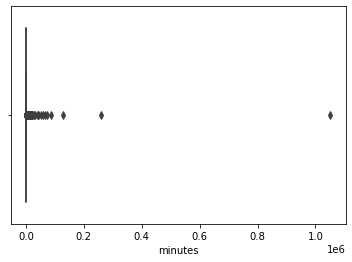

In [33]:
sns.boxplot(x=recipes_l0y["minutes"])

In [34]:
# calculate the first quartile, third quartile and the interquartile range
Q1 = recipes_l0y['minutes'].quantile(0.25)
Q3 = recipes_l0y['minutes'].quantile(0.75)
IQR = Q3 - Q1

In [35]:
# calculate the maximum value and minimum values according to the Tukey rule
max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR


In [36]:
# filter the data for values that are greater than max_value or less than min_value
minutes_outliers = recipes_l0y[(recipes_l0y['minutes'] > max_value) | (recipes_l0y['minutes'] < min_value)]
minutes_outliers.sort_values('minutes')

,name,id,minutes,submitted,tags,n_steps,steps,description,ingredients,n_ingredients,year,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates
206778,sweet rice pudding,454411,133,2011-04-25,"['time-to-make', 'course', 'main-ingredient', ...",23,"['place the rice in a medium-sized bowl', 'fil...",this is a traditional recipe from india and it...,"['basmati rice', 'whole milk', 'granulated sug...",7,2011,338.6,12.0,185.0,3.0,16.0,20.0,19.0
136325,mini pizzas with arugula peppers prosciutto,367460,134,2009-04-23,"['time-to-make', 'course', 'preparation', 'occ...",15,['lightly coat a large bowl with 1 teaspoons o...,got this recipe out of fine cooking magazine.....,"['extra virgin olive oil', 'pizza dough', 'who...",12,2009,80.8,8.0,5.0,9.0,11.0,12.0,0.0
89088,fruity mincemeat,444274,134,2010-12-16,"['time-to-make', 'main-ingredient', 'preparati...",8,['put the plums and 200ml of freshly squeezed ...,this recipe was recommended to me by a friend....,"['plums', 'oranges', 'dessert apples', 'curran...",14,2010,1380.6,28.0,961.0,1.0,27.0,9.0,95.0
7738,applebees chicken fajita rollup,499336,134,2013-04-22,"['time-to-make', 'course', 'main-ingredient', ...",18,['comgine the marinade ingredients in a medium...,todd wilbur's recipe for applebees chicken faj...,"['water', 'soy sauce', 'sugar', 'salt', 'white...",30,2013,929.3,62.0,77.0,272.0,107.0,78.0,29.0
35067,cape biryani breyani,429273,135,2010-06-10,"['time-to-make', 'preparation', '4-hours-or-le...",14,['preheat oven to 325 deg f / 160 deg celsius'...,"as a traditional cape malay recipe, there are ...","['chicken thighs', 'salt and pepper', 'butterm...",19,2010,778.0,50.0,27.0,10.0,92.0,45.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50152,chocolate chunk vanilla cake,372282,72000,2009-05-16,"['time-to-make', 'course', 'preparation', 'for...",10,['preheat oven to 350f grease an 8 or 9-inch s...,"this quick no fuss cake travel very well, so i...","['butter', 'granulated sugar', 'eggs', 'vanill...",9,2009,233.8,18.0,50.0,5.0,8.0,36.0,10.0
155096,peach cordial,435928,86415,2010-08-24,"['time-to-make', 'course', 'main-ingredient', ...",7,"['in a gallon glass mayonnaise jar , or other ...","now that peach season is here, make some of th...","['peaches', 'granulated sugar', 'cinnamon stic...",6,2010,111.2,0.0,46.0,0.0,0.0,0.0,3.0
106964,homemade vanilla extract,463624,129600,2011-09-05,"['time-to-make', 'preparation', 'occasion', 'f...",12,"['carefully open the bottle of brandy', 'pour ...",after getting a very poor bottle of vanilla ex...,"['brandy', 'vanilla beans']",2,2011,75.2,0.0,0.0,0.0,0.0,0.0,0.0
106963,homemade vanilla,425681,259205,2010-05-16,"['time-to-make', 'preparation', '5-ingredients...",9,['slice the vanilla beans length-wise and scra...,found this recipe on tammy's blog (http://www....,"['vanilla beans', 'vodka']",2,2010,69.4,0.0,0.0,0.0,0.0,0.0,0.0


Analyzing the outliers we can see recipes as 'how to preserve a husband' or 'homemade vanilla', that can delete, and there outliers recipes that last 133 minutes. We determine that our data set will be for easy recipes that maximum filter from 20 minutes recipes to 180 minutes.

In [37]:
recipes_l0y = recipes_l0y[recipes_l0y['minutes'] < 180]

In [38]:
recipes_l0y = recipes_l0y[recipes_l0y['minutes'] > 20]

In [39]:
recipes_l0y = recipes_l0y[recipes_l0y['calories'] < 2000]

In [40]:
recipes_l0y

,name,id,minutes,submitted,tags,n_steps,steps,description,ingredients,n_ingredients,year,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates
115,1 in canada chocolate chip cookies,453467,45,2011-04-11,"['60-minutes-or-less', 'time-to-make', 'cuisin...",12,"['pre-heat oven the 350 degrees f', 'in a mixi...",this is the recipe that we use at my school ca...,"['white sugar', 'brown sugar', 'salt', 'margar...",11,2011,595.1,46.0,211.0,22.0,13.0,51.0,26.0
125,2000 meatloaf,475785,90,2012-03-06,"['time-to-make', 'course', 'main-ingredient', ...",17,"['pan fry bacon , and set aside on a paper tow...","ready, set, cook! special edition contest entr...","['meatloaf mixture', 'unsmoked bacon', 'goat c...",13,2012,267.0,30.0,12.0,12.0,29.0,48.0,2.0
135,blepandekager danish apple pancakes,503475,50,2013-07-08,"['danish', '60-minutes-or-less', 'time-to-make...",10,"['beat the eggs lightly and add the milk', 'co...",this recipe has been posted here for play in z...,"['eggs', 'milk', 'flour', 'sugar', 'salt', 'cr...",10,2013,358.2,30.0,62.0,14.0,19.0,54.0,12.0
136,lplermagrone,522861,50,2015-07-25,"['60-minutes-or-less', 'time-to-make', 'course...",10,['a variant on the theme: in the swiss canton ...,älplermagronethe name doesn't translate perfec...,"['milk', 'salt', 'macaroni', 'cheese', 'fresh ...",8,2015,1003.8,72.0,21.0,103.0,69.0,143.0,37.0
137,lplermagrone herdsman s macaroni,457136,40,2011-05-23,"['60-minutes-or-less', 'time-to-make', 'course...",14,"['heat the oven to 100 c', 'boil potatoes in a...",basic ingredients for swiss alpine macaroni in...,"['potato', 'salt water', 'macaroni', 'heavy cr...",10,2011,708.6,52.0,19.0,24.0,46.0,104.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231606,zurich ragout zrcher geschnetzeltes,455538,35,2011-05-09,"['60-minutes-or-less', 'time-to-make', 'course...",11,['melt 1 tablespoon clarified butter over high...,i originally found this on the about.com websi...,"['veal', 'veal kidneys', 'clarified butter', '...",13,2011,278.8,22.0,5.0,12.0,38.0,39.0,2.0
231612,zurie s tomato and cream cheese tart,400445,60,2009-11-20,"['60-minutes-or-less', 'time-to-make', 'course...",13,"['heat oven to 420 deg f / 210 deg c', 'line a...",i'd like to dedicate this recipe to molly53. w...,"['pastry dough', 'cream cheese', 'salt', 'gree...",13,2009,648.6,73.0,59.0,19.0,24.0,109.0,15.0
231615,zuvers barbecue sauce,381216,30,2009-07-13,"['30-minutes-or-less', 'time-to-make', 'course...",6,"['mix first 5 ingredients in sauce pan', 'turn...","this barbecue sauce is great on ribs, chicken ...","['molasses', 'ketchup', 'apple cider vinegar',...",12,2009,595.5,1.0,527.0,62.0,5.0,0.0,50.0
231627,zwiebelwhe swiss onion tart,410985,165,2010-01-30,"['weeknight', 'time-to-make', 'course', 'main-...",38,"['crust:', 'pulse flour , baking powder , and ...",a delicious bacon-studded tart.,"['flour', 'baking powder', 'kosher salt', 'uns...",13,2010,440.1,49.0,15.0,10.0,22.0,90.0,9.0


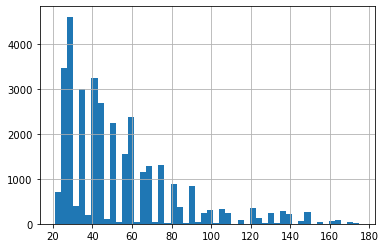

In [41]:
recipes_l0y['minutes'].hist(bins=50)

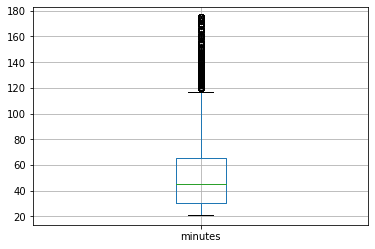

In [42]:
recipes_l0y[['minutes']].boxplot()

In [43]:
recipes_l0y.shape

(33802, 18)

In [44]:
recipes = recipes_l0y
recipes.shape

(33802, 18)

Explore how Kcal are distributed

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019B26C58640>]],
      dtype=object)

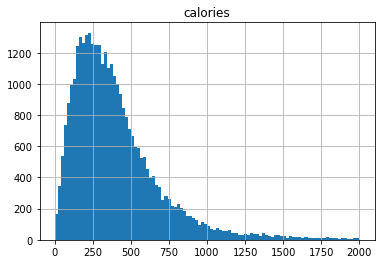

In [45]:
recipes.hist(column='calories', bins=100)

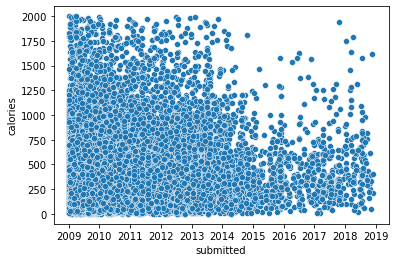

In [46]:
sns.scatterplot(data=recipes, x="submitted", y="calories")

# 5. Correlations

5.1 Headmap of correlations

In [47]:
# We dropp the columns with categorical values
corr_data = recipes.drop(['name','id','steps','description','ingredients','year'], axis=1)
correlations_matrix = corr_data.corr()
correlations_matrix


,minutes,n_steps,n_ingredients,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates
minutes,1.000000,0.226555,0.166603,0.132067,0.108800,0.076598,0.055275,0.090817,0.106485,0.083910
n_steps,0.226555,1.000000,0.352285,0.160920,0.143126,0.055323,0.050399,0.077726,0.150413,0.109500
n_ingredients,0.166603,0.352285,1.000000,0.195845,0.154166,-0.007045,0.102436,0.201211,0.100456,0.108326
calories,0.132067,0.160920,0.195845,1.000000,0.837245,0.366353,0.276099,0.650429,0.730294,0.670075
total_fat,0.108800,0.143126,0.154166,0.837245,1.000000,0.100912,0.208755,0.532254,0.867937,0.223725
sugar,0.076598,0.055323,-0.007045,0.366353,0.100912,1.000000,0.041305,-0.092630,0.145099,0.671922
sodium,0.055275,0.050399,0.102436,0.276099,0.208755,0.041305,1.000000,0.276383,0.168511,0.164215
protein,0.090817,0.077726,0.201211,0.650429,0.532254,-0.092630,0.276383,1.000000,0.412453,0.151871
saturated_fat,0.106485,0.150413,0.100456,0.730294,0.867937,0.145099,0.168511,0.412453,1.000000,0.224866
carbohydrates,0.083910,0.109500,0.108326,0.670075,0.223725,0.671922,0.164215,0.151871,0.224866,1.000000


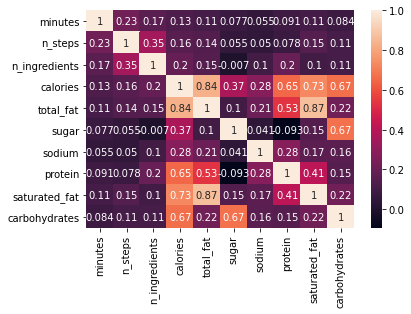

In [48]:
sns.heatmap(correlations_matrix, annot=True)
plt.show()

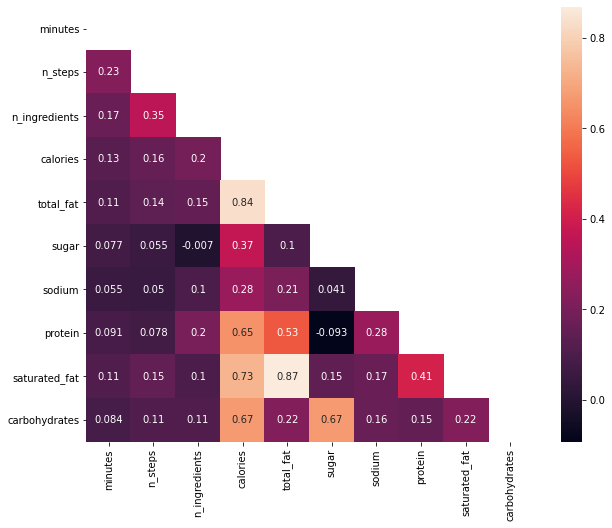

In [49]:
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show() 

Main Correlations:
    1. total_fat: 0.89 calories
    2. sugar: 0.69 calories
    3. saturated_fat: 0.84 calories
    4. carbohydrates_ 0.81 calories
    5. carbohydrates_ 0.87 calories
    6. saturated_fat: 0.84 calories
    7. saturated_fat: 0.86 calories

# 6.1 Exploring the tags (Word Trends)

Exploring the tags on our dataframe

In [50]:
#Convert to list
recipes['tags'] = recipes['tags'].apply(lambda x: literal_eval(str(x)))

In [51]:
recipes['healthy'] = ['healthy' in tag for tag in recipes['tags']]
recipes_tags = recipes.drop(columns=['name', 'tags', 'steps', 'description', 'ingredients'])
recipes_tags.head(2)

,id,minutes,submitted,n_steps,n_ingredients,year,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates,healthy
115,453467,45,2011-04-11,12,11,2011,595.1,46.0,211.0,22.0,13.0,51.0,26.0,False
125,475785,90,2012-03-06,17,13,2012,267.0,30.0,12.0,12.0,29.0,48.0,2.0,False


In [52]:
recipes_tags.dtypes

id                        int64
minutes                   int64
submitted        datetime64[ns]
n_steps                   int64
n_ingredients             int64
year                      int64
calories                float64
total_fat               float64
sugar                   float64
sodium                  float64
protein                 float64
saturated_fat           float64
carbohydrates           float64
healthy                    bool
dtype: object

In [53]:
df2 = recipes_tags.groupby(['year', 'healthy']).agg(
    recipe_cnt = ('id', 'count')
).reset_index()

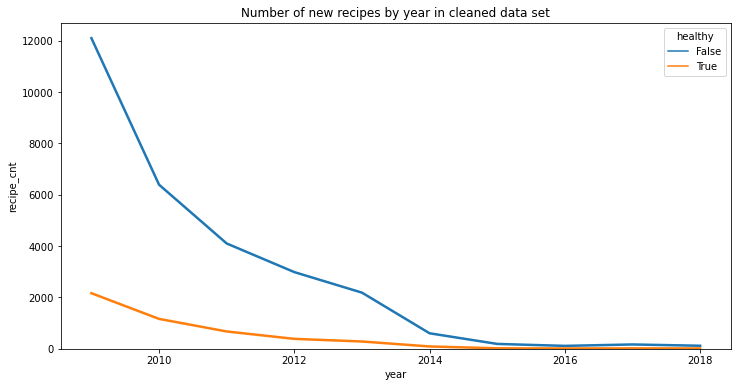

In [54]:
plt.figure(figsize=(12,6))

ax = sns.lineplot(data=df2, x='year', y='recipe_cnt', hue='healthy', linewidth=2.5)
ax.set(ylim=(0, None))
ax.set_title('Number of new recipes by year in cleaned data set')
ax

In [55]:
df2

,year,healthy,recipe_cnt
0,2009,False,12102
1,2009,True,2166
2,2010,False,6393
3,2010,True,1165
4,2011,False,4103
5,2011,True,675
6,2012,False,2988
7,2012,True,387
8,2013,False,2188
9,2013,True,285


We will visualize the ratio later in Tableau

Is it just our dataframe that was too much filtered and the number of recipes has declined? We apply it for all the dataframe

# 6.2 Exploring the tags for all dataset

In [56]:
#Convert to list
recipes_all['tags'] = recipes_all['tags'].apply(lambda x: literal_eval(str(x)))

In [57]:
recipes_all['healthy'] = ['healthy' in tag for tag in recipes_all['tags']]
recipes_tags_2 = recipes_all.drop(columns=['name', 'tags', 'steps', 'description', 'ingredients'])
recipes_tags_2.head(2)

,id,minutes,submitted,n_steps,n_ingredients,year,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates,healthy
115,453467,45,2011-04-11,12,11,2011,595.1,46.0,211.0,22.0,13.0,51.0,26.0,False
125,475785,90,2012-03-06,17,13,2012,267.0,30.0,12.0,12.0,29.0,48.0,2.0,False


In [58]:
df3 = recipes_all.groupby(['year', 'healthy']).agg(
    recipe_cnt = ('id', 'count')
).reset_index()

In [59]:
recipes_all.shape

(52940, 19)

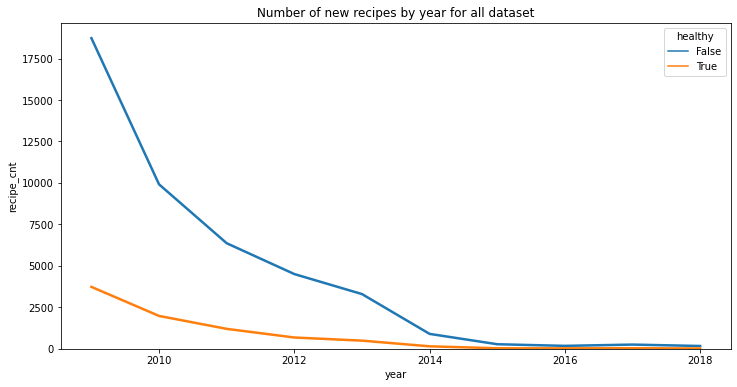

In [60]:
plt.figure(figsize=(12,6))

ax = sns.lineplot(data=df3, x='year', y='recipe_cnt', hue='healthy', linewidth=2.5)
ax.set(ylim=(0, None))
ax.set_title('Number of new recipes by year for all dataset')
ax

In [61]:
df3

,year,healthy,recipe_cnt
0,2009,False,18729
1,2009,True,3733
2,2010,False,9914
3,2010,True,1982
4,2011,False,6365
5,2011,True,1202
6,2012,False,4506
7,2012,True,681
8,2013,False,3300
9,2013,True,492


In [62]:
df3 = recipes_tags.groupby(['year']).agg({'id':'count','healthy':'sum'})
df3 = df3.assign(ratio = df3['healthy']/df3['id'])

In [63]:
df3.reset_index()

,year,id,healthy,ratio
0,2009,14268,2166.0,0.151808
1,2010,7558,1165.0,0.154141
2,2011,4778,675.0,0.141272
3,2012,3375,387.0,0.114667
4,2013,2473,285.0,0.115245
5,2014,695,91.0,0.130935
6,2015,209,19.0,0.090909
7,2016,127,13.0,0.102362
8,2017,186,17.0,0.091398
9,2018,133,14.0,0.105263


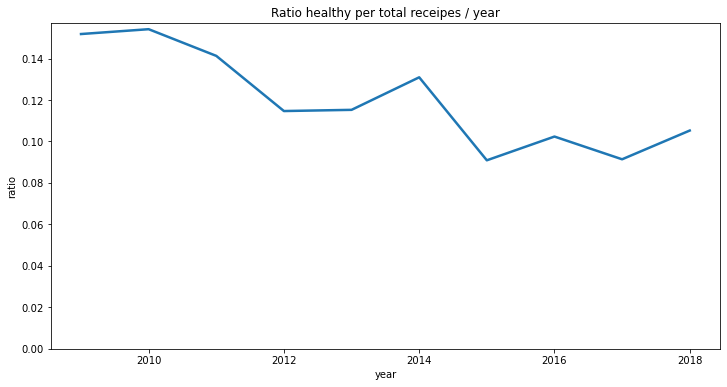

In [64]:
plt.figure(figsize=(12,6))

ax = sns.lineplot(data=df3, x='year', y='ratio', linewidth=2.5)
ax.set(ylim=(0, None))
ax.set_title('Ratio healthy per total receipes / year')
ax

We have the same problem in all the data set: There are less entries of food recipes for the last years, possible reasons:

- During the past year there was an increase of new media such as youtube, instagram and Facebook, and users tend to use this new platforms more than blogs
- Food.com might have stopped investing in attracting new contributors

# Export the dataframes and continue with the deeper exploration into another Jupyter Notebook (H0 Hypothesis)

#We export DataFrames
df2.to_csv(r'\Users\marcp\Desktop\Ironhack\Clases\FINAL PROJECT\Project 2\healthy_boolean.csv')

What does it mean healthy? We look for Keywords related to healthy dishes, it can be vegetarian, low in kcal....